### **Guerilla Marketing Campaign in Zürich, Switzerland**

##### **Import Resources**

In [1]:
import pandas as pd
import numpy as np
import requests
import json
from pandas.io.json import json_normalize
import folium

##### **Step 1: Get Trending Locations with the Foursquare API**

In [2]:
#API details
CLIENT_ID = 'MXLSID4D2C4YPFA1KZWJKY1QM4FJXXDXYHQZPPYF2V5PVFOI'
CLIENT_SECRET = 'F5CM2PTG4HREA3NY5311D2YKFIPHQO1EMWDQVEJLMN32LJMT'
VERSION = '20180605'

In [3]:
#Centre of Zürich
latitude = 47.369681 
longitude = 8.538869

#Search query
radius = 200
LIMIT = 25
categoryID = '4bf58dd8d48988d10a951735'
section = 'trending'
time = 'any'
day = 'any'

In [4]:
#Define url
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}&categoryID={}&section={}&time={}&day={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT, categoryID, section, time, day)
url

'https://api.foursquare.com/v2/venues/explore?client_id=MXLSID4D2C4YPFA1KZWJKY1QM4FJXXDXYHQZPPYF2V5PVFOI&client_secret=F5CM2PTG4HREA3NY5311D2YKFIPHQO1EMWDQVEJLMN32LJMT&ll=47.369681,8.538869&v=20180605&radius=200&limit=25&categoryID=4bf58dd8d48988d10a951735&section=trending&time=any&day=any'

In [5]:
#Get results
results = requests.get(url).json()

In [6]:
#Define function to extract data
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [7]:
#Create dataframe
venues = results['response']['groups'][0]['items']

#Flatten JSON
nearby_venues = json_normalize(venues) 

#Filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.id']
nearby_venues =nearby_venues.loc[:, filtered_columns]

#Filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

#Clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(25)

,name,categories,lat,lng,id
0,Münsterhof,Plaza,47.370051,8.540886,4e6eb0e91520a936fa570db9
1,Restaurant Bärengasse,Argentinian Restaurant,47.370471,8.538250,4b856505f964a520085b31e3
2,Restaurant Heugümper,French Restaurant,47.370111,8.539897,4cdbe87c5aeda1cdfb7fbf11
3,Restaurant zum Kropf,Swiss Restaurant,47.370817,8.540020,4bbb0667b35776b0837bcb01
4,Zunfthaus zur Waag,Swiss Restaurant,47.370073,8.540763,4b05888af964a52095cc22e3
5,Zeughauskeller,Swiss Restaurant,47.370250,8.539828,4b05888af964a52097cc22e3
6,Gucci,Boutique,47.369554,8.540217,4ce6aa588ef78cfa12f98d9b
7,PURO THE SOCIAL CLUB,Café,47.369390,8.540586,57d2af72498ef8be6ebd0fb6
8,Hermès,Boutique,47.370095,8.539474,4c5d6dc57735c9b643ef8e72
9,Louis Vuitton,Boutique,47.370611,8.539177,4c41d071ff711b8dae751205


##### **Step 2: Analyze the Data**

In [8]:
#Summarize venues
summary = nearby_venues['categories'].value_counts().to_frame()
summary

,categories
Café,4
Swiss Restaurant,4
Boutique,3
Italian Restaurant,2
Jewelry Store,2
Dessert Shop,2
Coffee Shop,1
Restaurant,1
French Restaurant,1
Argentinian Restaurant,1


In [9]:
#Venues in percent
summary_percent = (summary['categories'] / 25*100).round(0).to_frame()
summary_percent

,categories
Café,16.0
Swiss Restaurant,16.0
Boutique,12.0
Italian Restaurant,8.0
Jewelry Store,8.0
Dessert Shop,8.0
Coffee Shop,4.0
Restaurant,4.0
French Restaurant,4.0
Argentinian Restaurant,4.0


In [10]:
#Import chart resources
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

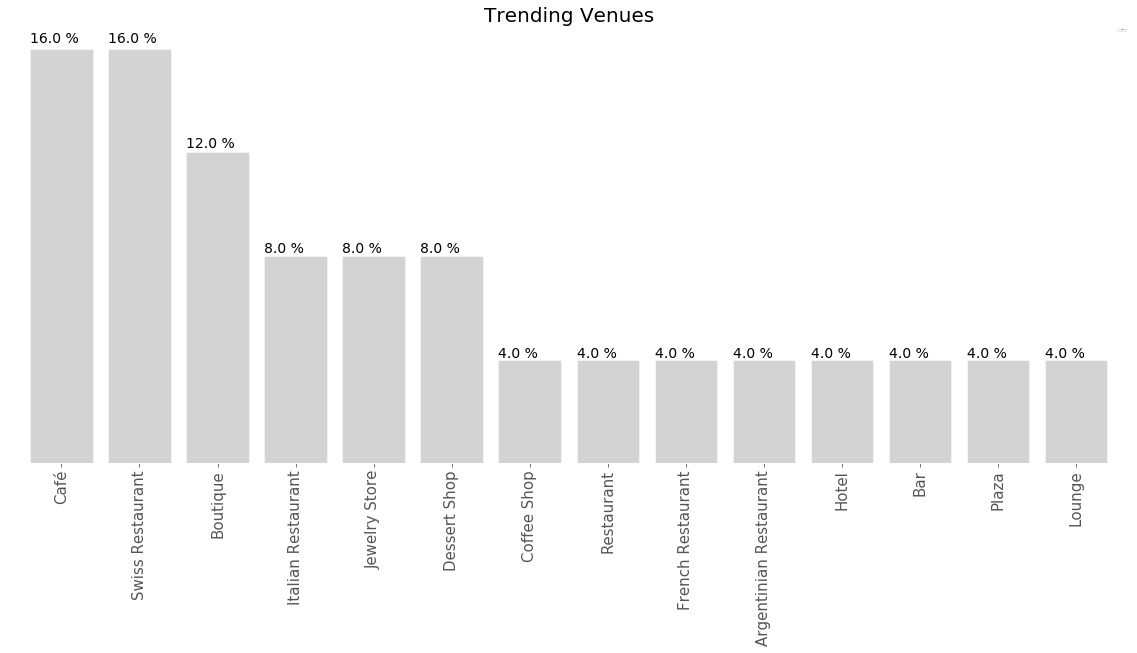

In [11]:
#Create chart
ax = summary_percent.plot(kind='bar', 
    figsize=(20, 8),
    width=(0.8),
    color=('lightgray'),
    fontsize=15,
    edgecolor='white',
)

for p in ax.patches:
    ax.annotate(str(p.get_height())+' %', (p.get_x() * 1, p.get_height() * 1.015), fontsize=14)

ax.axes.get_yaxis().set_visible(False)
ax.patch.set_facecolor('white')
plt.legend(facecolor='white', fontsize=0)
plt.title("Trending Venues", fontsize=20)

plt.show()

##### **Step 3: Create List and Map of Chosen Venues**

In [12]:
#Create new dataframe
chosen_venues = nearby_venues[nearby_venues.categories.isin(['Café', 'Swiss Restaurant', 'Boutique'])]
chosen_venues

,name,categories,lat,lng,id
3,Restaurant zum Kropf,Swiss Restaurant,47.370817,8.540020,4bbb0667b35776b0837bcb01
4,Zunfthaus zur Waag,Swiss Restaurant,47.370073,8.540763,4b05888af964a52095cc22e3
5,Zeughauskeller,Swiss Restaurant,47.370250,8.539828,4b05888af964a52097cc22e3
6,Gucci,Boutique,47.369554,8.540217,4ce6aa588ef78cfa12f98d9b
7,PURO THE SOCIAL CLUB,Café,47.369390,8.540586,57d2af72498ef8be6ebd0fb6
8,Hermès,Boutique,47.370095,8.539474,4c5d6dc57735c9b643ef8e72
9,Louis Vuitton,Boutique,47.370611,8.539177,4c41d071ff711b8dae751205
12,KafiZüri,Café,47.368352,8.539781,560e35ee498e99a65fd80eac
13,Le Raymond Bar,Café,47.368632,8.537338,564449d9498ed605ab455674
17,Coco Grill & Bar,Swiss Restaurant,47.368959,8.538431,4ba87663f964a520f7db39e3


In [13]:
#Create map
zh_map = folium.Map(location=[latitude, longitude], zoom_start=17, tiles='Cartodb Positron')

#Feature group
marketing_venues = folium.map.FeatureGroup()

#loop through venues
for lat, lng, in zip(chosen_venues.lat, chosen_venues.lng):
    marketing_venues.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5,
            color='black',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

#Add pop-up text
latitudes = list(chosen_venues.lat)
longitudes = list(chosen_venues.lng)
labels = list(chosen_venues.name)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(zh_map)    
    
#Add incidents to map
zh_map.add_child(marketing_venues)